In [1]:
import matplotlib
%matplotlib inline
import frbpoppy, matplotlib.pyplot as plt, numpy as np
from frbpoppy import *
from Convenience import *


In [4]:
PreFRBLE_population = { 'z_max':6., 'W_m':0.307115, 'W_v':0.692885, 'H_0':67.77 }  # 'alpha':logN/logS=?, 'emission_range':[min,max in Hz]=? }

In [2]:
PLOT = False

# Generate an FRB population
cosmic_pop = CosmicPopulation(1e5, name='example', **PreFRBLE_population )

# Setup a survey
survey = Survey('chime')

# Observe the FRB population
survey_pop = SurveyPopulation(cosmic_pop, survey, rate_limit=False)


# Check the detection rates
print(survey_pop.rates())

# Plot populations
if PLOT:
    plot(cosmic_pop, survey_pop, frbcat=False) # frbcat='parkes')

cosmic_pop.py | Generating example population
cosmic_pop.py | Finished generating example population
survey_pop.py | Surveying example with chime
rates.py      | chime                      Days       FRBs
rates.py      | ------------------------------------------
rates.py      | In population               1.0     100000
rates.py      | Detected                    1.0      6.501
rates.py      | Too late                    1.0        0.0
rates.py      | Too faint                   1.0    429.831
rates.py      | Outside survey              1.0  99563.668
rates.py      | /Gpc^3                   365.25      0.108
rates.py      | Expected                 0.1538          1
rates.py      | ------------------------------------------
rates.py      | 


In [ ]:
from time import time
t0 = time()

N = 4e7
#Setup a survey
survey = Survey('chime')
for population, color in zip( ['sfr','smd','vol_co'], ['blue','red','green']):
    # Generate an FRB population
    cosmic_pop = CosmicPopulation(N, name=population, n_model=population, **PreFRBLE_population )
    
    # Observe the FRB population
    survey_pop = SurveyPopulation(cosmic_pop, survey, rate_limit=False)
    
    P, x = histogram(cosmic_pop.frbs.z, density=True, bins=60, range=[0,6])
#    P, x = np.histogram(cosmic_pop.frbs.z, density=True, bins=60, range=[0,6])
    plt.plot( x[:-1]+np.diff(x)/2, P, label='cosmic population '+population, linestyle=':', color=color)
    
    Write2h5( likelihood_file_redshift, [P,x], [ KeyRedshift( population, "None", axis )  for axis in ["P","x"] ] )
    
    P, x = histogram(survey_pop.frbs.z, density=True, bins=60, range=[0,6])
#    P, x = np.histogram(survey_pop.frbs.z, density=True, bins=60, range=[0,6])
    plt.plot( x[:-1]+np.diff(x)/2, P, label='CHIME selection '+population, color=color)
    
    Write2h5( likelihood_file_redshift, [P,x], [ KeyRedshift( population, "CHIME", axis )  for axis in ["P","x"] ] )
    
plt.yscale('log')
plt.xlabel('redshift')
plt.ylabel('likelihood')
plt.legend()

print( "this took %.2f minutes" % ( (time()-t0)/60 ) )


cosmic_pop.py | Generating sfr population


/media/hqi/6A57-6B65/PreFRBLE/notebooks/Convenience.py:79: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5.File( likelihood_file_redshift ) as f:
/media/hqi/6A57-6B65/PreFRBLE/notebooks/Convenience.py:80: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  P = f[ KeyRedshift( population, telescope, 'P' ) ].value
/media/hqi/6A57-6B65/PreFRBLE/notebooks/Convenience.py:81: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  x = f[ KeyRedshift( population, telescope, 'x' ) ].value


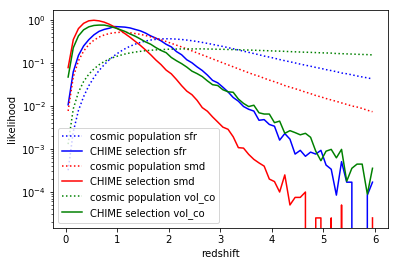

In [2]:
for population, color in zip( ['sfr','smd','vol_co'], ['blue','red','green']):
    P, x = GetLikelihood_Redshift( population=population, telescope='None')
    plt.plot( x[:-1]+np.diff(x)/2, P, label='cosmic population '+population, linestyle=':', color=color)
    
    P, x = GetLikelihood_Redshift( population=population, telescope='CHIME')
    plt.plot( x[:-1]+np.diff(x)/2, P, label='CHIME selection '+population, color=color)

plt.yscale('log')
plt.xlabel('redshift')
plt.ylabel('likelihood')
plt.legend()